# Data Analytics Assignment - G-15

**Group members**  
- PA106/G/17567/22 - Oyugi Mourice Odhiambo  
- PA106/G/17569/22 - Hawona Rodgers Wisdom  
- PA106/G/17566/22 - Erick Otako  
- PA106/G/17570/22 - Robin Obiri  
- PA106/G/17565/22 - Charles .M. Adams  
- PA106/G/17571/22 - Reinhard Onyango
- PA106/G/17447/22 - Jecinta Cherono
- PA106/G/17568/22 - Stanley Lumumba
- PA106/G/17574/22 - Aggrey Ouko
- PA106/G/15058/21 - Meshack Ngeno


## Decision Tree Employment Prediction

This project uses **Machine Learning** to predict whether a candidate is suitable for employment or not.

We use a **Decision Tree classifier** because:
- It works well with both numbers and categories.
- It is easy to explain visually.
- It mimics human decision-making (like asking step-by-step questions).

**Dataset source**  
IBM HR Analytics (mapped to required fields).  
Kaggle original: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

**Deliverables**  
- Notebook with code + explanations.  
- Visualized decision tree.  
- Model performance metrics.  
- Predictions for at least 3 hypothetical candidates with interpretation.  
- Feature importance analysis.

## Data Loading and Exploration

### Import required libraries

### Why these libraries?
- **pandas** → handles tables (like Excel in Python).
- **numpy** → supports math operations.
- **matplotlib** & **seaborn** → help us make plots.
- **train_test_split** → splits data into training and testing sets.
- **LabelEncoder** → converts text values (Yes/No) into numbers.
- **DecisionTreeClassifier** → the algorithm we use.
- **accuracy_score, confusion_matrix, classification_report** → evaluate model performance.

*Debug tip: If you see `ModuleNotFoundError`, run the `pip install` command at the top.

In [226]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Load the dataset

- We load the dataset into a DataFrame called `df_raw`.
- `.head()` shows the first 5 rows to confirm it loaded correctly.
- If you see a `FileNotFoundError`, check the file path and confirm the CSV is inside the **data/** folder.

- Run `df.columns` to see available column names before using them. This prevents `KeyError`.


In [227]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [228]:
# Show first rows
display(df.head())

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Mapping dataset columns to assignment fields

- We **restructure the dataset** into exactly the features we need.
- Scaling `JobLevel` into a 0–100 test score makes it easier to interpret.
- We add a target column: `suitable_for_employment`.
  - Attrition = "Yes" → Not suitable (No).
  - Attrition = "No" → Suitable (Yes).


In [229]:
# Map dataset columns to our required features
df = pd.DataFrame({
    "age": df["Age"],
    "education_level": df["Education"],
    "years_of_experience": df["TotalWorkingYears"],
    "technical_test_score": df["JobLevel"].astype(float),
    "interview_score": df["PerformanceRating"].astype(float),
    "previous_employment": df["NumCompaniesWorked"].apply(lambda x: "Yes" if pd.notnull(x) and x > 0 else "No"),
    "suitable_for_employment": df["Attrition"].apply(lambda x: "No" if x == "Yes" else "Yes")
})

In [230]:
df.head(5).style.hide(axis="index")

age,education_level,years_of_experience,technical_test_score,interview_score,previous_employment,suitable_for_employment
41,2,8,2.000000,3.000000,Yes,No
49,1,10,2.000000,4.000000,Yes,Yes
37,2,7,1.000000,3.000000,Yes,No
33,4,8,1.000000,3.000000,Yes,Yes
27,1,6,1.000000,3.000000,Yes,Yes


In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1470 non-null   int64  
 1   education_level          1470 non-null   int64  
 2   years_of_experience      1470 non-null   int64  
 3   technical_test_score     1470 non-null   float64
 4   interview_score          1470 non-null   float64
 5   previous_employment      1470 non-null   object 
 6   suitable_for_employment  1470 non-null   object 
dtypes: float64(2), int64(3), object(2)
memory usage: 80.5+ KB


In [232]:
df.isnull().sum()

,0
age,0
education_level,0
years_of_experience,0
technical_test_score,0
interview_score,0
previous_employment,0
suitable_for_employment,0


In [233]:
# check statistics of numeric columns
print("\nBasic descriptive stats for numeric columns:")
display(df.describe())


Basic descriptive stats for numeric columns:


,age,education_level,years_of_experience,technical_test_score,interview_score
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,2.912925,11.279592,2.063946,3.153741
std,9.135373,1.024165,7.780782,1.106940,0.360824
min,18.000000,1.000000,0.000000,1.000000,3.000000
25%,30.000000,2.000000,6.000000,1.000000,3.000000
50%,36.000000,3.000000,10.000000,2.000000,3.000000
75%,43.000000,4.000000,15.000000,3.000000,3.000000
max,60.000000,5.000000,40.000000,5.000000,4.000000


### EDA(Exploratory Data Analysis)
Understanding the dataset visually.
 - Histograms showing the distribution of numbers like age
 - Countplots showing how many candidates fall in each category

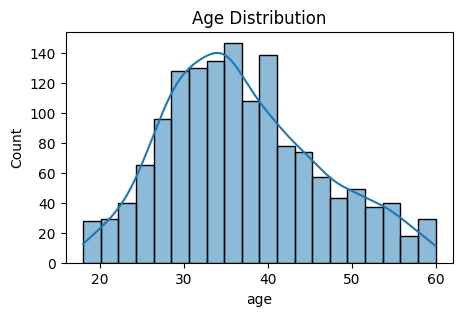

In [234]:
# Age distribution
plt.figure(figsize=(5,3))
sns.histplot(df['age'],bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

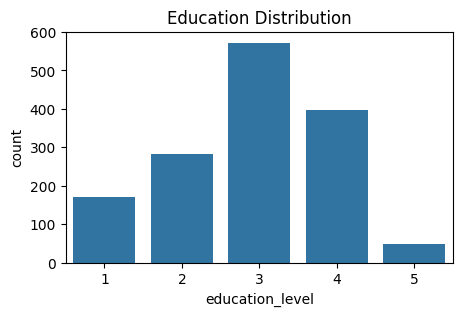

In [235]:
# Education Distribution
plt.figure(figsize=(5,3))
sns.countplot(x='education_level', data=df).figsize=(5,2)
plt.title('Education Distribution')
plt.show()

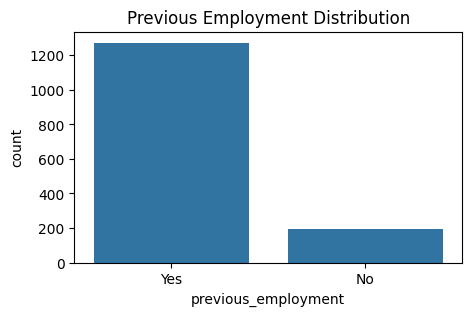

In [236]:
# Previous employment distribution
plt.figure(figsize=(5,3))
sns.countplot(x ="previous_employment", data=df)
plt.title('Previous Employment Distribution')
plt.show()

## Data Preprocessing

Preparing the dataset so the model can understand it.
### steps
1. Encode categorical columns: `previous_employment` and `suitable_for_employment`.  
2. Build feature matrix `X` using the columns required by the assignment.  
3. Use `suitable_for_employment_enc` as the numeric target `y`.  
4. Split into train (80%) and test (20%) sets with stratification.
### Key terms before preprocessing
- **Categorical variable**: column with discrete categories (e.g., "Yes"/"No").  
- **Label encoding**: converting text categories to integers.  
- **Feature matrix (X)**: input variables for the model.  
- **Target vector (y)**: the label we want to predict.  
- **Train/Test split**: partition data so the model trains on one set and is evaluated on another.


In [237]:
# import the libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [238]:
# Encode categorical values
le = LabelEncoder()
df['suitable_for_employment_enc'] = le.fit_transform(df['suitable_for_employment'])
df['previous_employment_enc'] = le.fit_transform(df['previous_employment'])

In [239]:
df.head().style.hide(axis="index")

age,education_level,years_of_experience,technical_test_score,interview_score,previous_employment,suitable_for_employment,suitable_for_employment_enc,previous_employment_enc
41,2,8,2.000000,3.000000,Yes,No,0,1
49,1,10,2.000000,4.000000,Yes,Yes,1,1
37,2,7,1.000000,3.000000,Yes,No,0,1
33,4,8,1.000000,3.000000,Yes,Yes,1,1
27,1,6,1.000000,3.000000,Yes,Yes,1,1


In [240]:
# Seperate the Features (X) and the Target(Y)
X = df.drop(['suitable_for_employment', 'suitable_for_employment_enc', 'previous_employment'], axis=1)
y = df['suitable_for_employment_enc']

In [241]:
X.head().style.hide(axis="index")

age,education_level,years_of_experience,technical_test_score,interview_score,previous_employment_enc
41,2,8,2.000000,3.000000,1
49,1,10,2.000000,4.000000,1
37,2,7,1.000000,3.000000,1
33,4,8,1.000000,3.000000,1
27,1,6,1.000000,3.000000,1


In [242]:
# Split data
# - `stratify=y` ensures class proportions (Yes/No) are preserved in train and test sets.
# - `random_state=42` fixes randomness so results are reproducible across runs.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 1176
Testing samples: 294


### Train the Decision tree
- We create a **Decision Tree model**.
- `.fit()` trains the model with the training data.
- The tree learns decision rules step by step (like “If age > 30 → go left, else right”).

In [243]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Visualize Tree
- This shows the actual **decision tree**.
- Each node asks a Yes/No question.
- Each branch narrows down to a prediction.
- Helps explain the model visually.

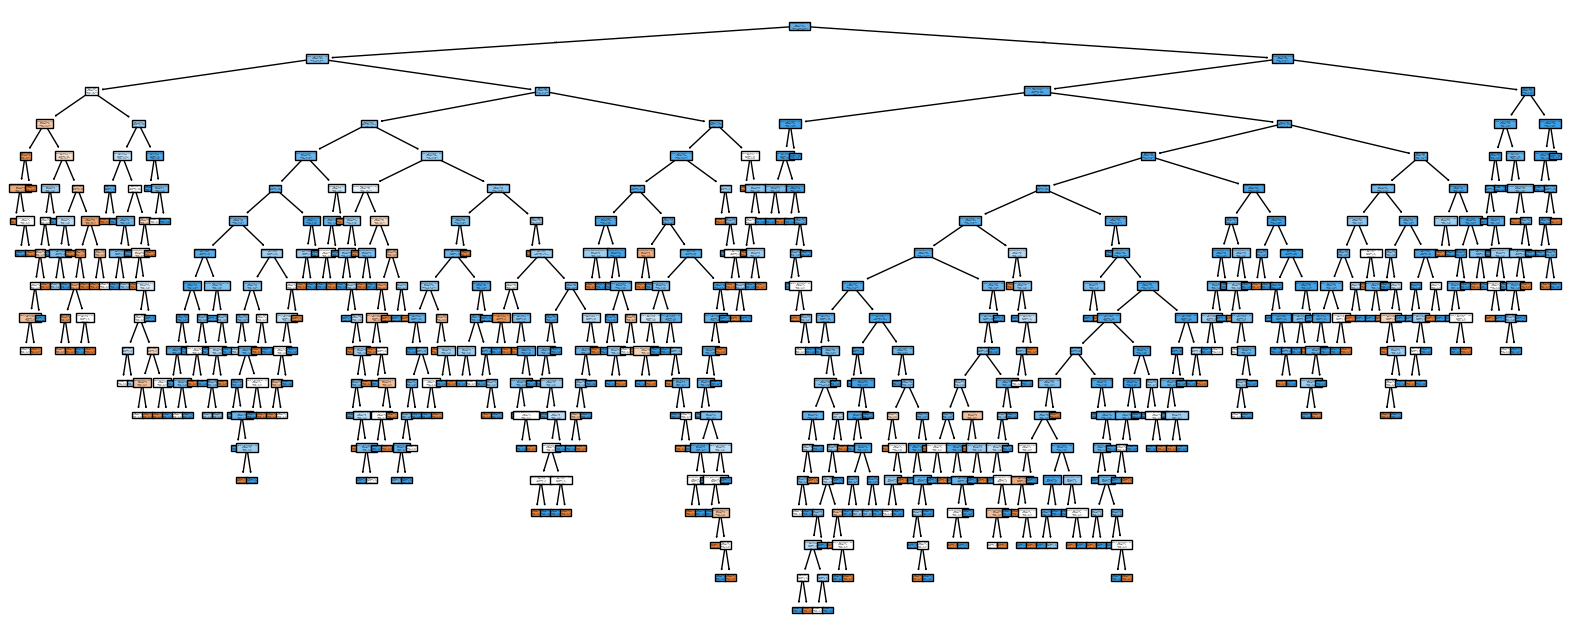

In [244]:
plt.figure(figsize=(20,8))
plot_tree(model, feature_names=X.columns, class_names=["No","Yes"], filled=True)
plt.show()

### Predict Hypothetical Candidates
- We test 3 hypothetical candidates:
  - Young with little experience → maybe No.
  - Experienced with high scores → Yes.
  - Average scores and experience → borderline case.
- The model predicts each candidate’s suitability.

In [245]:
candidates = pd.DataFrame({
    "age": [25, 40, 30, 45, 7],
    "education_level": [2, 5, 4, 6, 0],
    "years_of_experience": [2, 15, 5, 18, 0.5],
    "technical_test_score": [60, 100, 80, 97, 2],
    "interview_score": [3, 4, 2, 8, 4],
    "previous_employment_enc": [1, 1, 0, 2, 1]
})
preds = model.predict(candidates)
candidates["Predicted Suitability"] = preds
candidates["Predicted Suitability"] = candidates["Predicted Suitability"].map({0:"No",1:"Yes"})
candidates.style.hide(axis="index")

age,education_level,years_of_experience,technical_test_score,interview_score,previous_employment_enc,Predicted Suitability
25,2,2.000000,60,3,1,Yes
40,5,15.000000,100,4,1,Yes
30,4,5.000000,80,2,0,Yes
45,6,18.000000,97,8,2,Yes
7,0,0.500000,2,4,1,Yes


### Evaluate Model
#### Interpreting model evaluation

- **Accuracy** tells us the overall fraction of correct predictions.
- **Confusion matrix** shows true positives and negatives, and false positives and negatives.
  - Check false negatives (suitable candidates predicted not suitable) if missing a good hire is costly.
- **Precision** = among predicted Yes, how many truly are Yes.
- **Recall** = among actual Yes, how many were found by the model.
- **F1-score** balances precision and recall; useful with imbalanced classes.


Accuracy: 0.7142857142857143

Confusion Matrix:


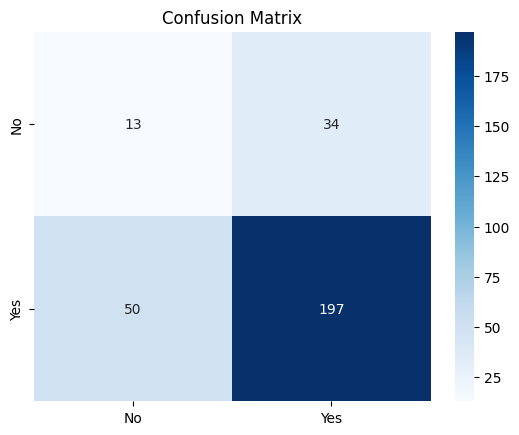


Classification Report:
              precision    recall  f1-score   support

           0       0.21      0.28      0.24        47
           1       0.85      0.80      0.82       247

    accuracy                           0.71       294
   macro avg       0.53      0.54      0.53       294
weighted avg       0.75      0.71      0.73       294



In [246]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No","Yes"], yticklabels=["No","Yes"])
plt.title("Confusion Matrix")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

### Feature Importance
- Values reflect how often and how well a feature was used to split nodes in the tree.
- Higher values mean the feature was more useful to reduce impurity and make decisions.

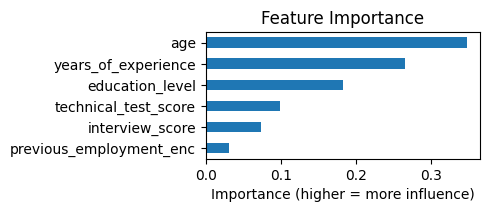

In [247]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh',figsize=(5,2))
plt.xlabel("Importance (higher = more influence)")
plt.tight_layout()
plt.title("Feature Importance")
plt.show()